<a href="https://colab.research.google.com/github/ummijumria1101/Tugas_Python_week10-UmmiJumria/blob/main/Ummi_Jumria_Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
ls

 3scene/                    Gatau1.ipynb
 asds.ipynb                'Salinan dari scenes_nn_4 layers.ipynb'
'cenes_nn_4 layers.ipynb'  'Ummi Jumria.ipynb'
 forest_test.jpg            Untitled0.ipynb


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:

print("loading images...")
imagePaths = paths.list_images("3scene")
data = []
labels = []

loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:

	image = Image.open(imagePath)
	image = np.array(image.resize((128, 128))) / 255.0 
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 'coast', 

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [ ]:

# perform a training and testing split, using 80% of the data for
# training and 20% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.30, shuffle=True)
print(trainX.shape)
print(testX.shape)

(663, 128, 128, 3)
(285, 128, 128, 3)


In [86]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(128*128*3,)),
        Dense(144, activation="relu", name="layer1"),
        Dense(32, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(3, activation = "softmax", name="layer4"),
    ]
)

In [87]:

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 49152)             0         
_________________________________________________________________
layer1 (Dense)               (None, 144)               7078032   
_________________________________________________________________
layer2 (Dense)               (None, 32)                4640      
_________________________________________________________________
layer3 (Dense)               (None, 16)                528       
_________________________________________________________________
layer4 (Dense)               (None, 3)                 51        
Total params: 7,083,251
Trainable params: 7,083,251
Non-trainable params: 0
_________________________________________________________________


In [88]:

# train the model using the Adam optimizer
print("training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

training network...
Epoch 1/25
21/21 [==============================] - 0s 15ms/step - loss: 4.0710 - accuracy: 0.3635 - val_loss: 1.9692 - val_accuracy: 0.3684
Epoch 2/25
21/21 [==============================] - 0s 9ms/step - loss: 1.0745 - accuracy: 0.5490 - val_loss: 0.8461 - val_accuracy: 0.6737
Epoch 3/25
21/21 [==============================] - 0s 9ms/step - loss: 0.8337 - accuracy: 0.6531 - val_loss: 0.8778 - val_accuracy: 0.6175
Epoch 4/25
21/21 [==============================] - 0s 10ms/step - loss: 0.9150 - accuracy: 0.6335 - val_loss: 1.2550 - val_accuracy: 0.4772
Epoch 5/25
21/21 [==============================] - 0s 9ms/step - loss: 0.8220 - accuracy: 0.6546 - val_loss: 1.0016 - val_accuracy: 0.5965
Epoch 6/25
21/21 [==============================] - 0s 9ms/step - loss: 0.9445 - accuracy: 0.6712 - val_loss: 1.6506 - val_accuracy: 0.4316
Epoch 7/25
21/21 [==============================] - 0s 9ms/step - loss: 0.7416 - accuracy: 0.7014 - val_loss: 0.7244 - val_accuracy: 0.743

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


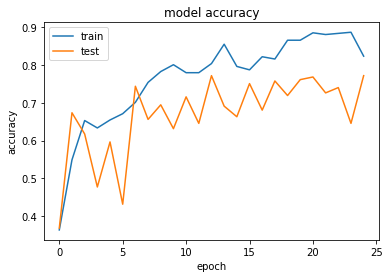

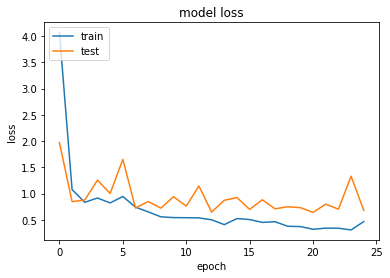

In [89]:

import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [90]:

print("evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

evaluating network...
              precision    recall  f1-score   support

       coast       0.77      0.75      0.76       108
      forest       0.85      0.74      0.79        98
     highway       0.70      0.84      0.76        79

    accuracy                           0.77       285
   macro avg       0.77      0.78      0.77       285
weighted avg       0.78      0.77      0.77       285



In [91]:

model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


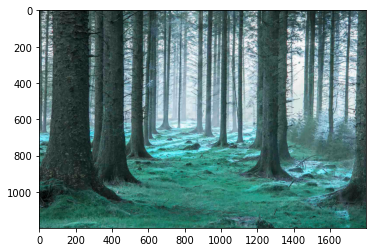

In [92]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [93]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [94]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)
